In [65]:
%autoreload 2
%reload_ext autoreload
from DS9Utils import *
from DS9Utils import PlotFit1D
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt



flight = Table.read('/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018-Flight/Flight/dobc_data/180922/CosmicRayFree/OS_corrected/HeaderCatalog_info.csv')

In [66]:
cat = Table.read('/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/TotalMergedCatalog_info.csv')#catxy = Table.read('/Users/Vincent/DS9BackUp/subsets/190412_19H17m44/TotalMergedCatalog_info_xy.csv')
#cat = Table.read('/Users/Vincent/DS9BackUp/subsets/190419_08H45m36/TotalMergedCatalog_info_bofore_stacking.csv')#catxy = Table.read('/Users/Vincent/DS9BackUp/subsets/190412_19H17m44/TotalMergedCatalog_info_xy.csv')


cat = cat[(cat['OverscannLeft']<5000) & (cat['Smearing_coeff_phys']<1) & (cat['MeanADUValue']<5000) & (cat['Smearing_coeff_phys']>0)]
np.histogram(cat['EMCCDBAC'])
cat115 = cat[cat['EMCCDBAC']<-114.5]
cat104 = cat[cat['EMCCDBAC']>-105]

#cat105 = cat[(cat['EMCCDBAC']<-105) & (cat['EMCCDBAC']>-107)]
cat109 = cat[(cat['EMCCDBAC']>-110) & (cat['EMCCDBAC']<-107)]
cat113 = cat[(cat['EMCCDBAC']<-110) & (cat['EMCCDBAC']>-114)]
cat109 = cat109[(cat109['MeanADUValue']>20)  ]

cat113 = cat113[np.ma.mask_or((cat113['MeanADUValue']>2000), (cat113['MeanADUValue']<1000))]



In [67]:
T=[cat104['EMCCDBAC'].mean(),cat109['EMCCDBAC'].mean(),cat113['EMCCDBAC'].mean(),cat115['EMCCDBAC'].mean()]
Ti = np.linspace(min(T),max(T),1e3)

/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


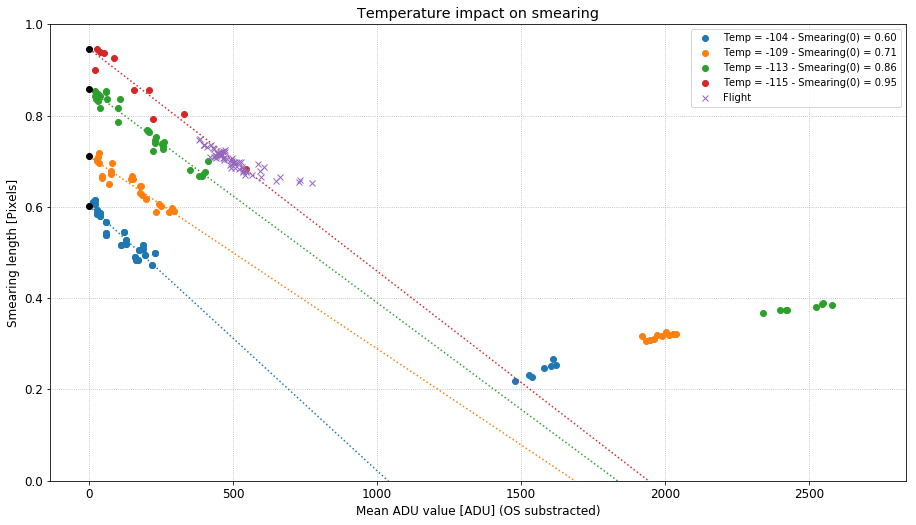

In [68]:
cat113 = cat113[cat113['Gtot_var_int_w_OS']*cat113['GainFactorVarIntens']<500]
zerpoints=[]
points470=[]
meanadu=490
#PlotFit1D(cati['MeanADUValue'],cati['Smearing_coeff_phys'],Plot=False)
x=np.linspace(1,2700,1e5)
for cati, temp in zip([cat104,cat109,cat113,cat115],[-104,-109,-113,-115]):
    popt = PlotFit1D(cati[cati['MeanADUValue']<1000]['MeanADUValue'],cati[cati['MeanADUValue']<1000]['Smearing_coeff_phys'],Plot=False, deg=1)
    p = plt.plot(x,popt(x),linestyle='dotted')
    plt.plot(cati['MeanADUValue'],cati['Smearing_coeff_phys'],'o',label='Temp = %i - Smearing(0) = %0.2f'%(temp,popt[0]), color=p[0].get_color())
    zerpoints.append(popt(0))
    points470.append(popt(meanadu))
    plt.plot(0, popt(0), 'o', color='black')
plt.plot(flight['MeanADUValue'],flight['Smearing_coeff_phys'],'x',label='Flight')
#plt.vlines(meanadu,0.2,0.8,label='Flight mean ADU value')
#plt.hlines(0.7,0,1000,linestyle='dashed',label='Flight mean smearing')
plt.xlabel('Mean ADU value [ADU] (OS substracted)')
plt.ylabel('Smearing length [Pixels]')
plt.title('Temperature impact on smearing')
plt.ylim((0,1))
plt.legend()

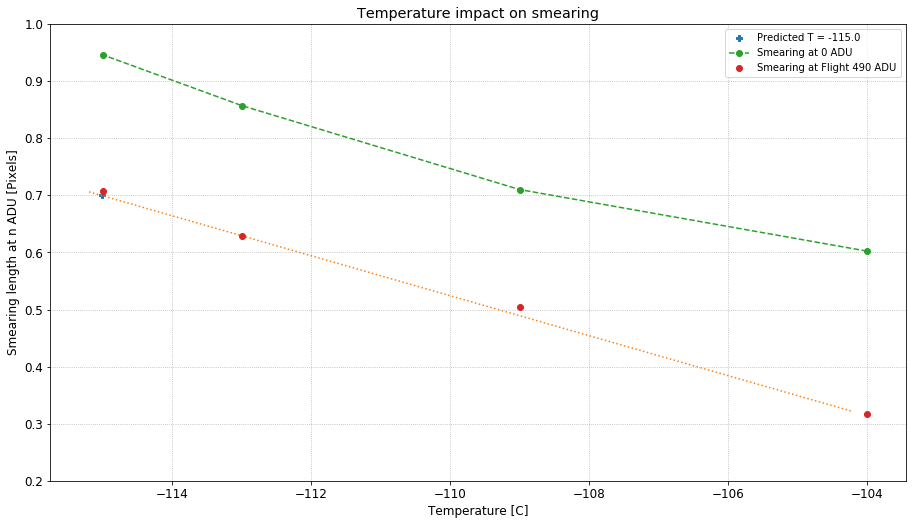

In [70]:
plt.figure()
popt = PlotFit1D(points470,T,Plot=False, deg=1)
plt.plot(popt(0.7),0.7,'P', label='Predicted T = %0.1f'%(popt(0.7)))
popt1 = PlotFit1D(T,points470,Plot=False, deg=1)
plt.plot(Ti,popt1(Ti),linestyle='dotted')
plt.plot([-104,-109,-113,-115],zerpoints,'--o',label='Smearing at 0 ADU')
plt.plot([-104,-109,-113,-115],points470,'o',label='Smearing at Flight %i ADU'%(meanadu))
plt.xlabel('Temperature [C]')
plt.ylabel('Smearing length at n ADU [Pixels]')
plt.title('Temperature impact on smearing')
#plt.hlines(0.7,-116,-113,label='Flight mean smearing @ 490')
plt.ylim((0.2,1))
plt.legend()
Tsmear = popt(0.7)

/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


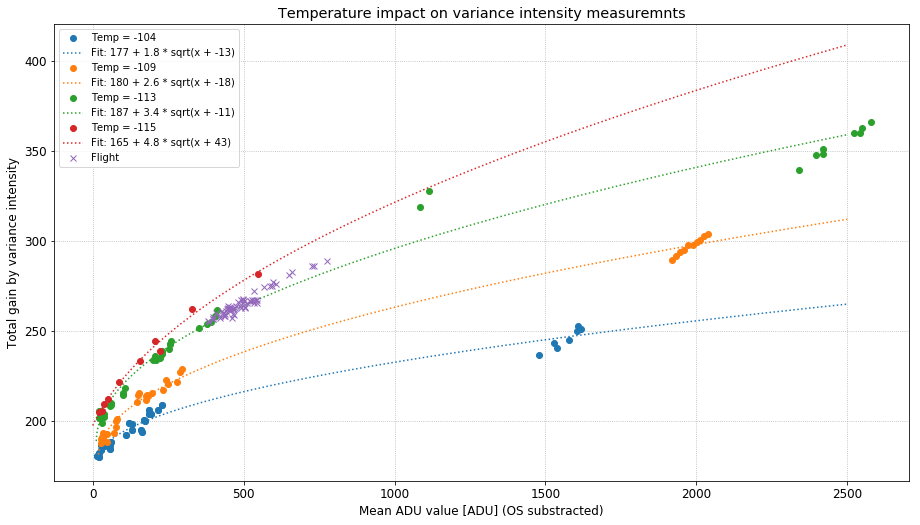

In [71]:
cat = Table.read('/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/TotalMergedCatalog_info.csv')
#cat = Table.read('/Users/Vincent/DS9BackUp/subsets/190419_08H45m36/TotalMergedCatalog_info_bofore_stacking.csv')#catxy = Table.read('/Users/Vincent/DS9BackUp/subsets/190412_19H17m44/TotalMergedCatalog_info_xy.csv')

cat = cat[(cat['OverscannLeft']<5000) & (cat['Smearing_coeff_phys']<1) & (cat['MeanADUValue']<5000) & (cat['Smearing_coeff_phys']>0)]
np.histogram(cat['EMCCDBAC'])
cat115 = cat[cat['EMCCDBAC']<-114.5]
cat104 = cat[cat['EMCCDBAC']>-105]

cat109 = cat[(cat['EMCCDBAC']>-110) & (cat['EMCCDBAC']<-107)]
cat113 = cat[(cat['EMCCDBAC']<-110) & (cat['EMCCDBAC']>-114)]

cat109 = cat109[(cat109['MeanADUValue']>20)]
cat113 = cat113[(cat113['Gtot_var_int_w_OS']<368)]

fsqrt = lambda  x, offset, a, b : offset + a * np.sqrt( x + b)  
points470=[]
x = np.linspace(0,2500,1e4)
for cati, temp in zip([cat104,cat109,cat113,cat115],[-104,-109,-113,-115]):
    #popt = PlotFit1D(cati['MeanADUValue'],cati['Gtot_var_int_w_OS'],Plot=True, deg=2)
    p = plt.plot(cati['MeanADUValue'],cati['Gtot_var_int_w_OS'],'o',label='Temp = %i'%(temp))
    popt, pcov = curve_fit(fsqrt, cati['MeanADUValue'],cati['Gtot_var_int_w_OS'])
    points470.append(fsqrt(meanadu,*popt))
    plt.plot(x,fsqrt(x,*popt),linestyle='dotted', c=p[0].get_color(), label = 'Fit: %i + %0.1f * sqrt(x + %i)'%(popt[0],popt[1],popt[2]) )
plt.plot(flight['MeanADUValue'],flight['Gtot_var_int_w_OS'],'x',label='Flight')
#plt.vlines(meanadu,200,300,label='Flight mean ADU value')
#plt.hlines(265,300,700,label='Flight mean total gain')
plt.xlabel('Mean ADU value [ADU] (OS substracted)')
plt.ylabel('Total gain by variance intensity')
plt.title('Temperature impact on variance intensity measuremnts')
plt.legend()

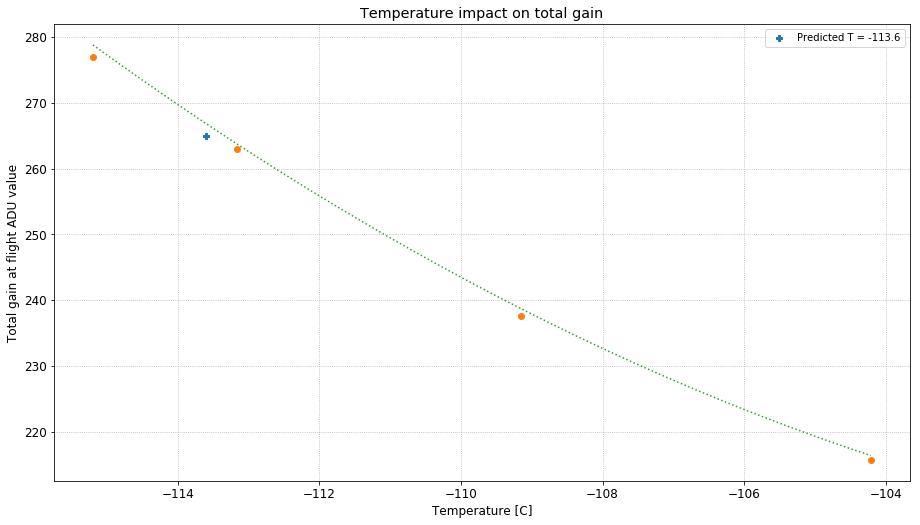

In [73]:
plt.figure()
popt = PlotFit1D(points470,T,Plot=False, deg=2)
plt.plot(popt(265),265,'P', label='Predicted T = %0.1f'%(popt(265)))
plt.plot(T,points470,'o')
popt1 = PlotFit1D([-104,-109,-113,-115],points470,Plot=False, deg=2)
plt.plot(Ti,popt1(Ti),linestyle='dotted')
plt.xlabel('Temperature [C]')

#plt.hlines(265,-114,-112,label='Flight mean total gain')
plt.ylabel('Total gain at flight ADU value')
plt.title('Temperature impact on total gain')
plt.legend()
Tgain = popt(265)

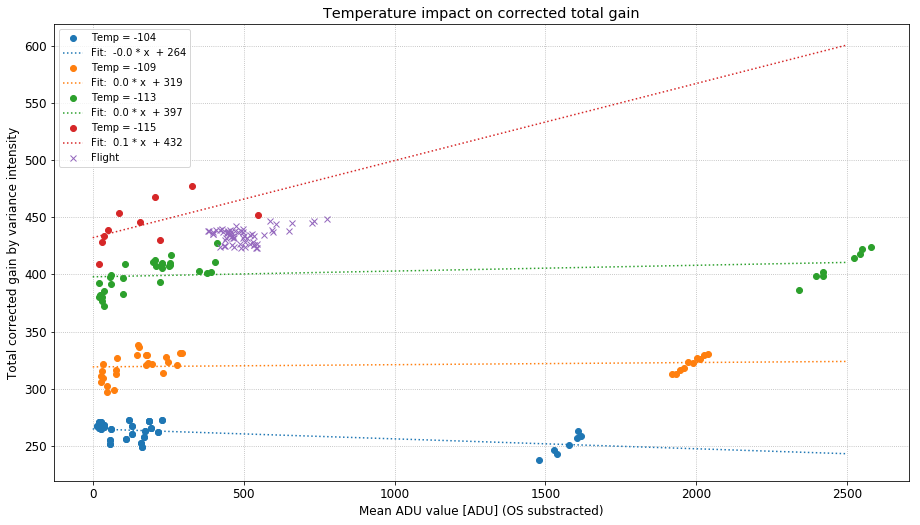

In [80]:
points470 = []

cat113 = cat113[cat113['Gtot_var_int_w_OS']*cat113['GainFactorVarIntens']<500]
for cati, temp in zip([cat104,cat109,cat113,cat115],T):
    popt = PlotFit1D(cati['MeanADUValue'],cati['Gtot_var_int_w_OS']*cati['GainFactorVarIntens'],Plot=False, deg=1)
    p = plt.plot(cati['MeanADUValue'],cati['Gtot_var_int_w_OS']*cati['GainFactorVarIntens'],'o',label='Temp = %i'%(temp))
    plt.plot(x,popt(x),linestyle='dotted', c=p[0].get_color(), label = 'Fit:  %0.1f * x  + %i'%(popt[1],popt[0]) )
    points470.append(popt(470))
plt.plot(flight['MeanADUValue'],flight['Gtot_var_int_w_OS']*flight['GainFactorVarIntens'],'x',label='Flight')
#plt.vlines(meanadu,200,500,label='Flight mean ADU value')
#plt.hlines(434,0,2500,label='Flight mean correctedtotal gain')
plt.xlabel('Mean ADU value [ADU] (OS substracted)')
plt.ylabel('Total corrected gain by variance intensity')
plt.title('Temperature impact on corrected total gain')
plt.legend()


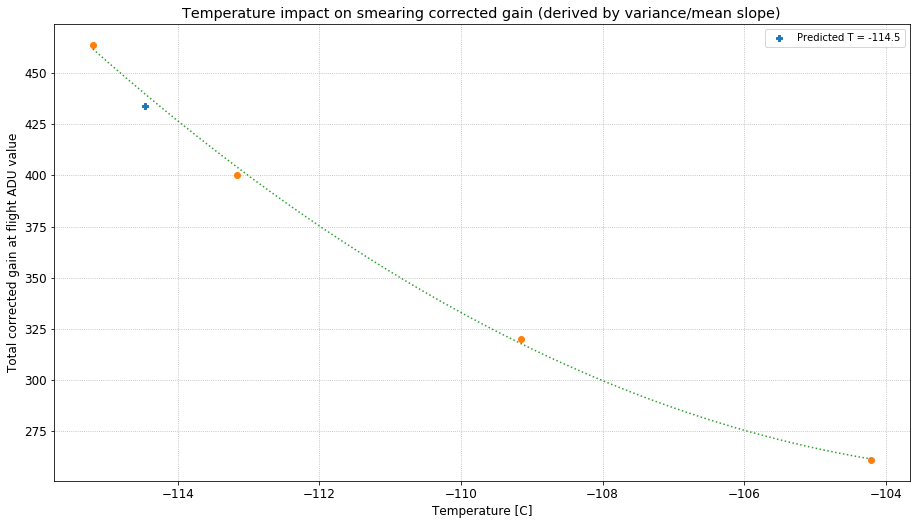

In [79]:
plt.figure()
popt = PlotFit1D(points470,T,Plot=False, deg=2)
plt.plot(popt(434),434,'P', label='Predicted T = %0.1f'%(popt(434)))
plt.plot(T,points470,'o')
popt1 = PlotFit1D(T,points470,Plot=False, deg=2)
plt.plot(Ti,popt1(Ti),linestyle='dotted')
#plt.hlines(379,-114,-110,label='Flight mean correctedtotal gain')
plt.xlabel('Temperature [C]')
plt.ylabel('Total corrected gain at flight ADU value')
plt.title('Temperature impact on smearing corrected gain (derived by variance/mean slope)')
plt.legend()
Tgaincorr = popt(434)

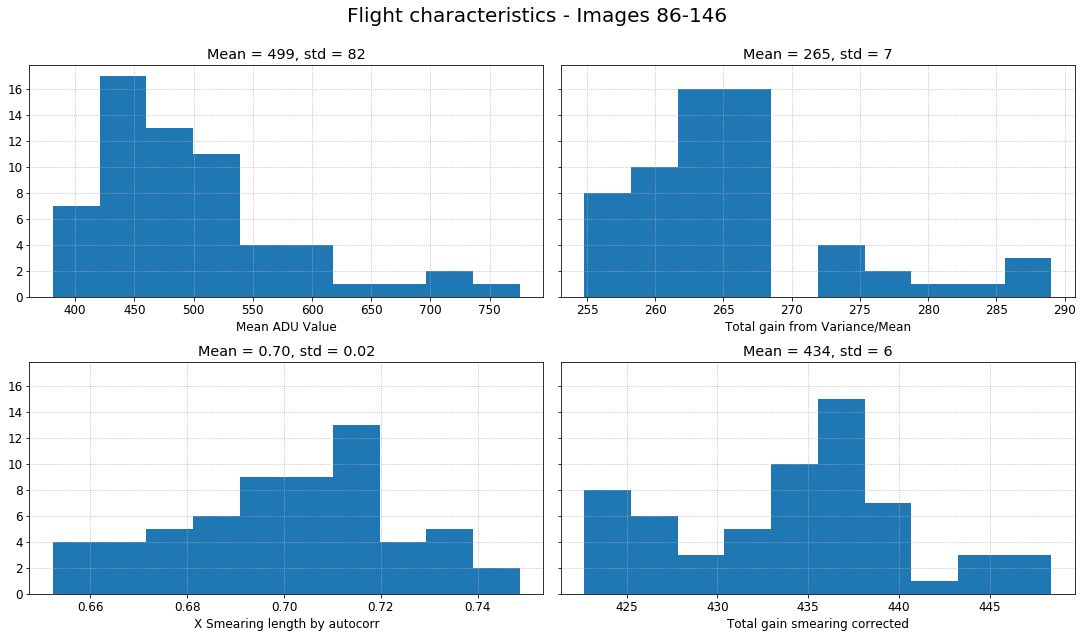

In [77]:

flight = Table.read('/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018-Flight/Flight/dobc_data/180922/CosmicRayFree/OS_corrected/HeaderCatalog_info.csv')

f, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, sharey=True)
ax0.hist(flight['MeanADUValue'])
ax0.set_title('Mean = %i, std = %i'%(flight['MeanADUValue'].mean(),flight['MeanADUValue'].std()))
ax0.set_xlabel('Mean ADU Value')
ax1.hist(flight['Gtot_var_int_w_OS'])
ax1.set_title('Mean = %i, std = %i'%(flight['Gtot_var_int_w_OS'].mean(),flight['Gtot_var_int_w_OS'].std()))
ax1.set_xlabel('Total gain from Variance/Mean')
ax2.hist(flight['Smearing_coeff_phys'])
ax2.set_title('Mean = %0.2f, std = %0.2f'%(flight['Smearing_coeff_phys'].mean(),flight['Smearing_coeff_phys'].std()))
ax2.set_xlabel('X Smearing length by autocorr')
ax3.hist(flight['Gtot_var_int_w_OS']*flight['GainFactorVarIntens'])
ax3.set_title('Mean = %i, std = %i'%((flight['Gtot_var_int_w_OS']*flight['GainFactorVarIntens']).mean(),(flight['Gtot_var_int_w_OS']*flight['GainFactorVarIntens']).std()))
ax3.set_xlabel('Total gain smearing corrected')
f.suptitle('Flight characteristics - Images 86-146',y=1.05,fontsize=20)
f.tight_layout()
plt.show()

/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


-114.46811173067005 -113.60233458327616 -115.01488781840392
1406.3293662142823


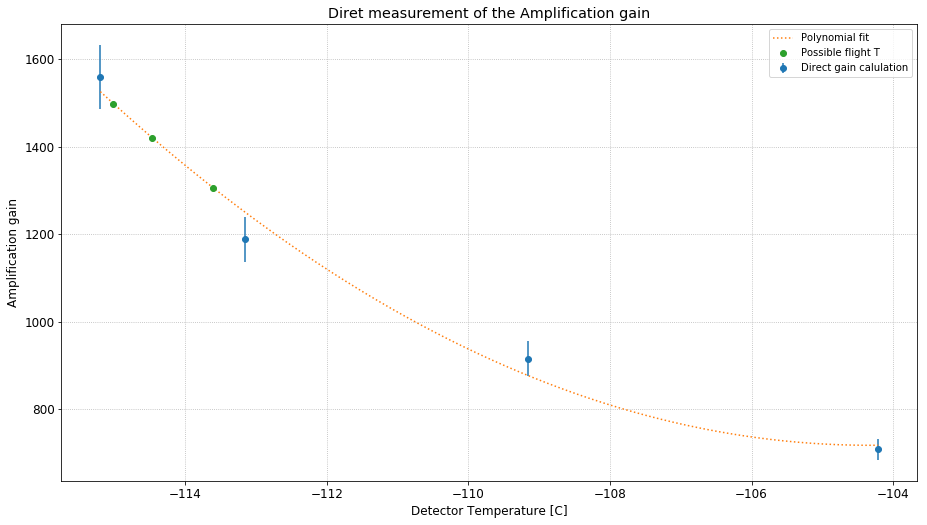

In [85]:
gain=[708.5,915.5,1188.4,1560]
err = [24.4,40,51.5,73]
plt.figure()
popt = PlotFit1D(T,gain,Plot=False, deg=2)
plt.errorbar(T,gain,yerr=err,fmt='o' ,label='Direct gain calulation')
Ti = np.linspace(min(T),max(T),1e4)
plt.plot(Ti,popt(Ti),linestyle='dotted' ,label='Polynomial fit')
plt.plot([Tgaincorr,Tgain,Tsmear],popt([Tgaincorr,Tgain,Tsmear]),'o' ,label='Possible flight T')#: %0.1f -> G=%0.1f'%(-113.8,popt(-113.8)))
plt.legend()
plt.xlabel('Detector Temperature [C]')
plt.ylabel('Amplification gain')
plt.title('Diret measurement of the Amplification gain')
plt.show()
print(Tgaincorr,Tgain,Tsmear)
print(popt((Tgaincorr+Tgain+Tsmear)/3))

MASK,N_CR3,VSS,N_CR4,BITPIX,TEMPDATE,N_CR1,EMGAIN,TEMPTIME,EXPTIME,IMG,N_CR,DATE,SHUTTER,PRESSURE,N_CR2,PREAMP,EMCCDBAC,TEMP,IMNO,IMBURST,PATH,FPATH,index,date,Col2ColDiff,Line2lineDiff,OverscannRight,OverscannLeft,Gtot_var_int_w_OS,TopImage,BottomImage,MeanADUValue,SaturatedPixels,MeanFlux,stdXY,stdY,stdX,MeanADUValueTR,MeanADUValueBR,MeanADUValueBL,MeanADUValueTL,Gtot_var_int_wo_OS,Smearing_coeff_phys,GainFactorVarIntens,GainFactorHist,BrightSpotFlux,EMCCDBack[C],pressure[mbar],AnalyzeOSSmearing
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str16,float64,str19,float64,float64,float64,float64,float64,float64,float64,float64,str112,str88,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.0,0.0,2.0,0.0,-64.0,1000.0,0.0,9200.0,1000.0,10.0,image000829.fits,0.0,2019-02-23T23:22:40,0.0,3.7e-07,0.0,1.77,-113.149442674901,1000.0,829.0,20.0,/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/190223/lowsignalT_113/CosmicRayFree/image000829.CRv_cs.fits,/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/190223/lowsignalT_113/CosmicRayFree,0,190223,16.1914953968342,6.413491011813047,3303.4960892065055,3302.0094018313403,203.56869523754676,3382.2263,3311.71385,24.711882443531827,0.0,0.0,118.86530458421603,124.43984131813312,113.80819281141406,25.514783157894737,23.436026052104207,22.960503006012026,27.089172631578947,276.1755559465515,0.8352483043437205,1.8763020454560722,1.4367551014305837,0.7453999999999723,--,--,0.012489097437312021
0.6223260476522923,0.0,2.0,0.0,-64.0,1000.0,4.0,9200.0,1000.0,50.0,image000901.fits,5.0,2019-02-23T23:49:59,0.0,3.8e-07,1.0,1.77,-113.369812051226,1000.0,901.0,20.0,/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/190223/lowsignalT_113/CosmicRayFree/image000901.CRv_cs.fits,/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/190223/lowsignalT_113/CosmicRayFree,1,190223,16.301729080401696,12.571463170902783,3298.6952094627895,3298.869969650593,215.57113059292172,3439.4218499999997,3402.29835,101.77040050793808,0.0,0.0,222.30028052291874,229.170129243924,213.13981889595385,105.09589342094036,97.42854180700786,95.29735280968258,109.85190699053388,276.14018538712435,0.815727314155154,1.840501757552752,1.4181441189682953,0.366279999999997,--,--,0.021007777287862964
11.48340583212502,2.0,2.0,2.0,-64.0,1000.0,40.0,9200.0,1000.0,200.0,image000985.fits,45.0,2019-02-24T02:32:34,0.0,3.7e-07,5.0,1.77,-113.56001894846,1000.0,985.0,20.0,/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/190223/lowsignalT_113/CosmicRayFree/image000985.CRv_cs.fits,/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/190223/lowsignalT_113/CosmicRayFree,2,190224,16.80130961670096,24.895212694972127,3239.7594640914035,3246.004074795258,254.04846597838198,3616.445752759705,3686.8395499999992,379.96833806589314,0.0,0.0,471.9919425235855,422.9856275277915,445.03753287110516,387.3892110290492,369.92882190986813,361.2073177998315,410.1416371244964,297.8020672968345,0.668070964198463,1.5782940305109514,1.2826794765338092,0.638610000000001,--,--,0.034775182974260466
0.269409090095412,0.0,2.0,0.0,-64.0,1000.0,0.0,9200.0,1000.0,10.0,image001433.fits,1.0,2019-02-24T11:20:27,0.0,4.0999e-07,1.0,1.77,-113.243664325614,1000.0,1433.0,20.0,/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/190223/lowsignalT_113/CosmicRayFree/image001433.CRv_cs.fits,/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/190223/lowsignalT_113/CosmicRayFree,3,190224,16.452762880107606,6.160073559785632,3308.760988171513,3307.49460973775,201.38279881361325,3380.19595,3324.9717499999997,22.10058541558328,0.0,0.0,113.09018883353029,92.22514509199607,90.05703561632484,22.682857805613548,21.318881763527052,20.75037274549098,23.77655744680851,257.7065083199239,0.8419670654577652,1.8886692880900593,1.4431899164977848,0.5783200000000306,--,--,-0.010843305141182256
0.2306535631813544,0.0,2.0,0.0,-64.0,1000.0,4.0,9200

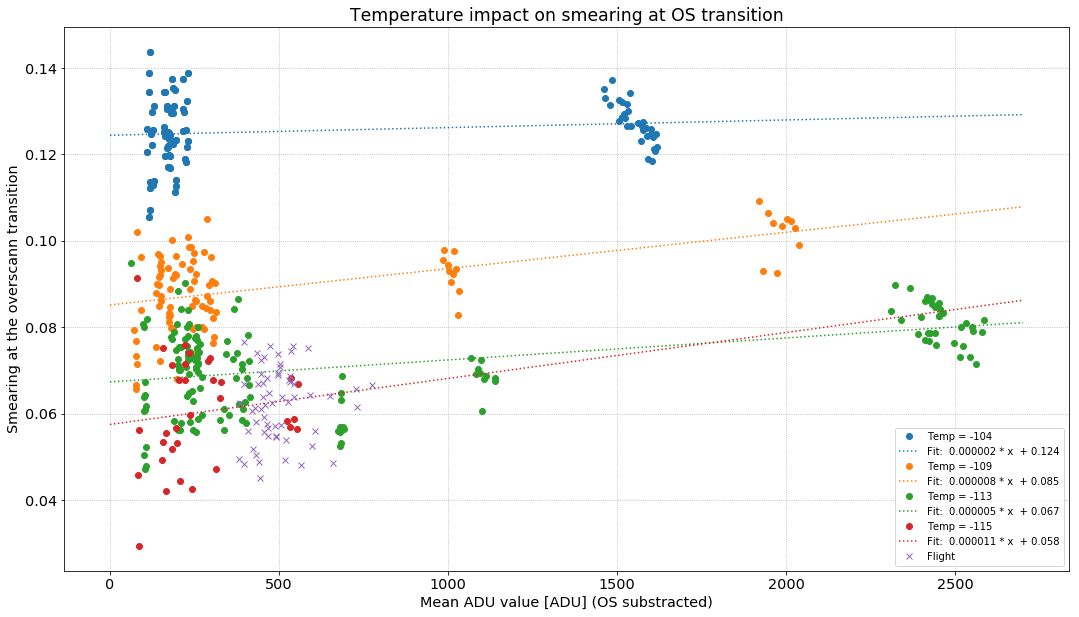

In [94]:
cat = Table.read('/Users/Vincent/DS9BackUp/subsets/190419_08H45m36/TotalMergedCatalog_info_bofore_stacking.csv')#catxy = Table.read('/Users/Vincent/DS9BackUp/subsets/190412_19H17m44/TotalMergedCatalog_info_xy.csv')
cat = cat[(cat['OverscannLeft']<5000) & (cat['Smearing_coeff_phys']<1) & (cat['MeanADUValue']<5000) & (cat['Smearing_coeff_phys']>0)]
#np.histogram(cat['EMCCDBAC'])
cat115 = cat[cat['EMCCDBAC']<-114.5]
cat104 = cat[cat['EMCCDBAC']>-105]
cat109 = cat[(cat['EMCCDBAC']>-110) & (cat['EMCCDBAC']<-107)]
cat113 = cat[(cat['EMCCDBAC']<-110) & (cat['EMCCDBAC']>-114)]
cat109 = cat109[(cat109['MeanADUValue']>20)]
cat113 = cat113[(cat113['Gtot_var_int_w_OS']<368)]
for cati, temp in zip([cat104,cat109,cat113,cat115],T):
    popt = PlotFit1D(cati['MeanADUValue'],cati['AnalyzeOSSmearing_0'],Plot=False, deg=1)
    p = plt.plot(cati['MeanADUValue'],cati['AnalyzeOSSmearing_0'],'o',label='Temp = %i'%(temp))
    plt.plot(x,popt(x),linestyle='dotted', c=p[0].get_color(), label = 'Fit:  %0.6f * x  + %0.3f'%(popt[1],popt[0]) )
    points470.append(popt(470))
plt.plot(flight['MeanADUValue'],flight['AnalyzeOSSmearing_0'],'x',label='Flight')
#plt.vlines(meanadu,200,500,label='Flight mean ADU value')
#plt.hlines(434,0,2500,label='Flight mean correctedtotal gain')
plt.xlabel('Mean ADU value [ADU] (OS substracted)')
plt.ylabel('Smearing at the overscann transition')
plt.title('Temperature impact on smearing at OS transition')
plt.legend()

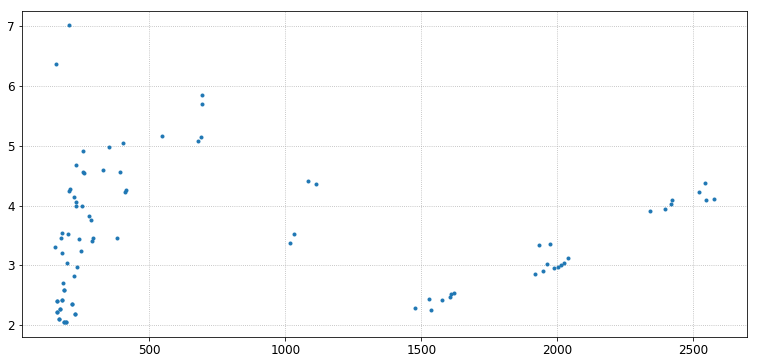

In [236]:
cat = Table.read('/Users/Vincent/DS9BackUp/subsets/190415_17H17m47/TotalMergedCatalog_info.csv')#catxy = Table.read('/Users/Vincent/DS9BackUp/subsets/190412_19H17m44/TotalMergedCatalog_info_xy.csv')
#cat = Table.read('/Users/Vincent/DS9BackUp/subsets/190419_08H45m36/TotalMergedCatalog_info_bofore_stacking.csv')#catxy = Table.read('/Users/Vincent/DS9BackUp/subsets/190412_19H17m44/TotalMergedCatalog_info_xy.csv')


cat = cat[(cat['MeanADUValue']<10000)&(cat['MeanADUValue']>150)& (cat['AnalyzeOSSmearing_0']>2/999)]#cat[(abs(cat['AnalyzeOSSmearing_0'])<30) & (cat['MeanADUValue']>300) & (cat['AnalyzeOSSmearing_1']!=0)& (cat['AnalyzeOSSmearing_0']!=0)]
np.histogram(cat['EMCCDBAC'])
cat115 = cat[cat['EMCCDBAC']<-114.5]
cat104 = cat[cat['EMCCDBAC']>-105]

#cat105 = cat[(cat['EMCCDBAC']<-105) & (cat['EMCCDBAC']>-107)]
cat109 = cat[(cat['EMCCDBAC']>-110) & (cat['EMCCDBAC']<-107)]
cat113 = cat[(cat['EMCCDBAC']<-110) & (cat['EMCCDBAC']>-114)]
cat109 = cat109#[(cat109['MeanADUValue']>20)  ]

cat113 = cat113#[np.ma.mask_or((cat113['MeanADUValue']>2000), (cat113['MeanADUValue']<1000))]

#plt.plot(cat['EMCCDBAC'],cat['AnalyzeOSSmearing_1'],'.')
plt.plot(cat['MeanADUValue'],cat['AnalyzeOSSmearing_0'],'.')

In [256]:
#cat115

[autoreload of DS9Utils failed: Traceback (most recent call last):
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/Vincent/Documents/FireBallPipe/Calibration/DS9Utils.py", line 26, in <module>
    import matplotlib; matplo

In [257]:
flight = Table.read('/Users/Vincent/Nextcloud/FIREBALL/TestsFTS2018-Flight/Flight/dobc_data/180922/CosmicRayFree/OS_corrected/HeaderCatalog_info.csv')

In [260]:
zerpoints=[]
points470=[]
meanadu=490
#PlotFit1D(cati['MeanADUValue'],cati['Smearing_coeff_phys'],Plot=False)
x=np.linspace(-114,-104,1e3)
for cati, temp in zip([cat104,cat109,cat113,cat115],[-104,-109,-113,-115]):
    #popt = PlotFit1D(cati['EMCCDBAC'],cati['AnalyzeOSSmearing_0'],Plot=False, deg=1)
    plt.plot(cati['EMCCDBAC'],cati['AnalyzeOSSmearing_0'],'o',label='Temp = %i'%(temp))
    #zerpoints.append(popt(0))
    #points470.append(popt(meanadu))
    #plt.plot(0, popt(0), 'o', color='black')
plt.plot(flight['TEMP'],flight['AnalyzeOSSmearing_0'],'x',label='Flight')
#plt.vlines(meanadu,0.2,0.8,label='Flight mean ADU value')
#plt.hlines(0.7,0,1000,linestyle='dashed',label='Flight mean smearing')
plt.xlabel('Temperature [C]')
plt.ylabel('Smearing length [Pixels]')
plt.title('Temperature impact on smearing at the overscann transition')
#plt.ylim((0,30))
plt.legend()

[autoreload of DS9Utils failed: Traceback (most recent call last):
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/Vincent/Documents/FireBallPipe/Calibration/DS9Utils.py", line 27, in <module>
    import matplotlib.pyplot 

NameError: name '_obsolete_set' is not defined

In [176]:
zerpoints=[]
points470=[]
meanadu=490
#PlotFit1D(cati['MeanADUValue'],cati['Smearing_coeff_phys'],Plot=False)
x=np.linspace(-114,-104,1e3)
for cati, temp in zip([cat104,cat109,cat113,cat115],[-104,-109,-113,-115]):
    popt = PlotFit1D(cati[cati['MeanADUValue']<10000]['EMCCDBAC'],cati[cati['MeanADUValue']<10000]['FluxDeffect_0'],Plot=False, deg=1)
    p = plt.plot(x,popt(x),linestyle='dotted')
    plt.plot(cati['EMCCDBAC'],cati['FluxDeffect_0'],'o',label='Temp = %i - Smearing(0) = %0.2f'%(temp,popt[0]), color=p[0].get_color())
    zerpoints.append(popt(0))
    points470.append(popt(meanadu))
    #plt.plot(0, popt(0), 'o', color='black')
#plt.plot(flight['MeanADUValue'],flight['BrightSpotFlux'],'x',label='Flight')
#plt.vlines(meanadu,0.2,0.8,label='Flight mean ADU value')
#plt.hlines(0.7,0,1000,linestyle='dashed',label='Flight mean smearing')
plt.xlabel('Mean ADU value [ADU] (OS substracted)')
plt.ylabel('Smearing length [Pixels]')
plt.title('Temperature impact on smearing')
#plt.ylim((0,1))
plt.legend()

/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


KeyError: 'FluxDeffect_0'

In [253]:
f, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2,2, sharey=True)
ax0.hist(flight['MeanADUValue'])
ax0.set_title('Mean = %i, std = %i'%(flight['MeanADUValue'].mean(),flight['MeanADUValue'].std()))
ax0.set_xlabel('Mean ADU Value')
ax1.hist(flight['Gtot_var_int_w_OS'])
ax1.set_title('Mean = %i, std = %i'%(flight['Gtot_var_int_w_OS'].mean(),flight['Gtot_var_int_w_OS'].std()))
ax1.set_xlabel('Total gain Variance Intensity')
ax2.hist(flight['Smearing_coeff_phys'])
ax2.set_title('Mean = %0.2f, std = %0.2f'%(flight['Smearing_coeff_phys'].mean(),flight['Smearing_coeff_phys'].std()))
ax2.set_xlabel('X Smearing coeff by autocorr')
ax3.hist(flight['Gtot_var_int_w_OS']*flight['GainFactorVarIntens'])
ax3.set_title('Mean = %i, std = %i'%((flight['Gtot_var_int_w_OS']*flight['GainFactorVarIntens']).mean(),(flight['Gtot_var_int_w_OS']*flight['GainFactorVarIntens']).std()))
ax3.set_xlabel('Total gain smearing corrected')
f.suptitle('Flight characteristics - Images 86-146',y=1.05,fontsize=20)
f.tight_layout()
plt.show()

/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/matplotlib/__init__.py:1038: UserWarning: Bad val "macosx" on line #41
	"backend: macosx
"
	in file "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc"
	module 'matplotlib.rcsetup' has no attribute '_auto_backend_sentinel'
  
[autoreload of matplotlib failed: Traceback (most recent call last):
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec,

NameError: name '_obsolete_set' is not defined

In [18]:
dark = Table.read('/Users/Vincent/DS9BackUp/subsets/190424_10H34m15/Dark_catalog_good.csv')

/Users/Vincent/anaconda2/envs/Python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


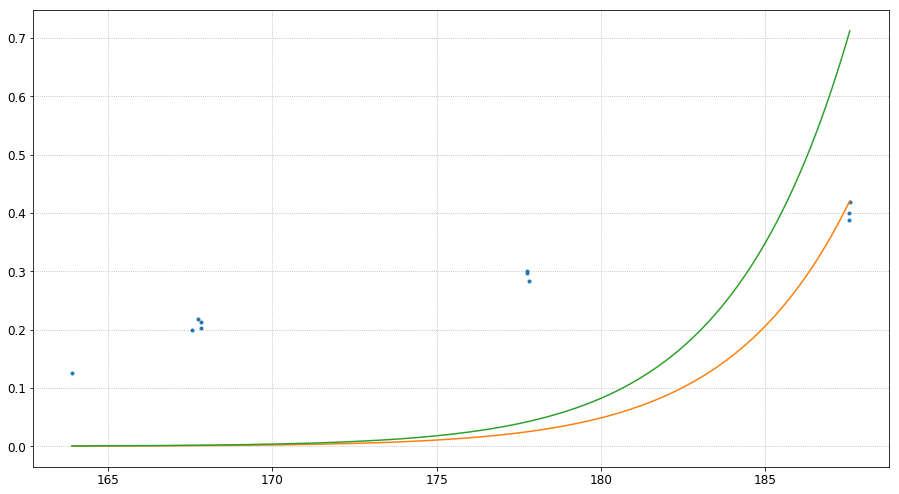

In [64]:
x = np.linspace(dark['Temp1'].min(),dark['Temp1'].max(),1e4)
f = lambda t, a : a * 1.14 * 1e6 * t**3 * np.exp(-9080/t)
popt1, pcov = curve_fit(f,273+dark['Temp1'],dark['dark_top'] )
#popt1, pcov = curve_fit(f,273+dark['Temp1'],np.log10(dark['dark_top']) )

#plt.plot(dark['Temp1'],np.log10(dark['dark_top']),'.')
plt.plot(273+dark['Temp1'],dark['dark_top'],'.')

plt.plot(273+x,f(273+x,*popt1))
plt.plot(273+x,f(273+x,1e8))

popt = PlotFit1D(dark['Temp1'],dark['dark_top'],Plot=False, deg=1, title='Temperature impact on Dark current', xlabel='Temperature [C]', ylabel='Dark current [e-/pix/sec]')

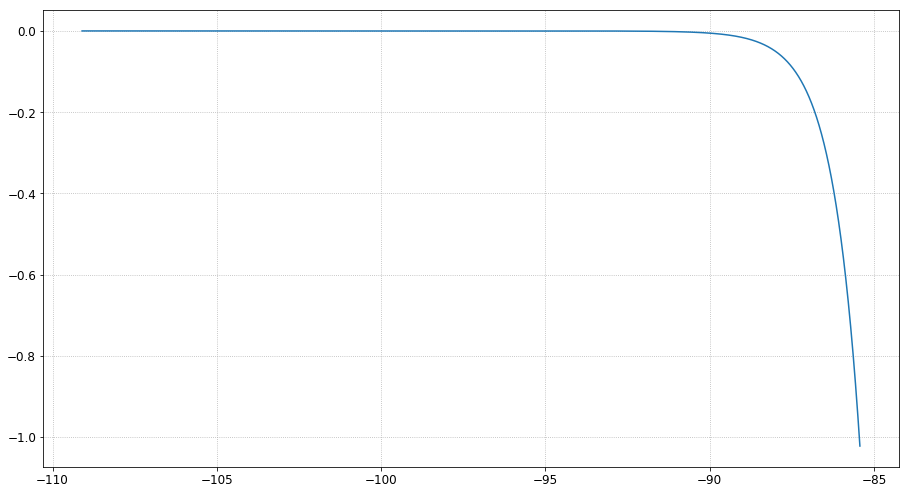

In [40]:
plt.plot(x,f(x,1e-58))